In [1]:
 #importing pandas dataframe
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

#importing seaborn
import seaborn as sns

#importing pandas profiling 
import pandas_profiling as pf

#importing matplolib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

#importing reg-ex
import re

In [2]:
#Hold out method for splitting data
from sklearn.model_selection import train_test_split

#importing accuracy_score 
from sklearn.metrics import accuracy_score 

#importing xgboost
import xgboost

In [3]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
from lightgbm import LGBMClassifier

In [5]:
# Importing datasets
rating = ['UserID','MovieID','Rating','Timestamp']
user = ['UserID','Gender','Age','Occupation','Zip-code']
movie = ['MovieID','Title','Genres']

In [6]:
rating_df = pd.read_csv('ratings.dat',header=None,delimiter='::',names=rating)
print(rating_df.head())
print()
print(rating_df.shape)

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

(218508, 4)


In [7]:
user_df = pd.read_csv('users.dat',header=None,delimiter='::',names=user)
print(user_df.head())
print()
print(user_df.shape)

   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

(6040, 5)


In [8]:
movie_df = pd.read_csv('movies.dat',header=None,delimiter='::',names=movie)
print(movie_df.head())
print()
print(movie_df.shape)

   MovieID                               Title                        Genres
0        1                                None                          None
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

(3883, 3)


In [9]:
#Merging three datasets

df = rating_df.merge(user_df,how='outer',on='UserID')
df = df.merge(movie_df,how='outer',on='MovieID')
df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1.0,1193.0,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2.0,1193.0,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12.0,1193.0,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15.0,1193.0,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17.0,1193.0,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223625 entries, 0 to 223624
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   UserID      223223 non-null  float64
 1   MovieID     218910 non-null  float64
 2   Rating      218508 non-null  float64
 3   Timestamp   218508 non-null  float64
 4   Gender      223223 non-null  object 
 5   Age         223223 non-null  float64
 6   Occupation  223223 non-null  float64
 7   Zip-code    223223 non-null  object 
 8   Title       218454 non-null  object 
 9   Genres      218454 non-null  object 
dtypes: float64(6), object(4)
memory usage: 18.8+ MB


In [11]:
df.shape

(223625, 10)

<AxesSubplot:>

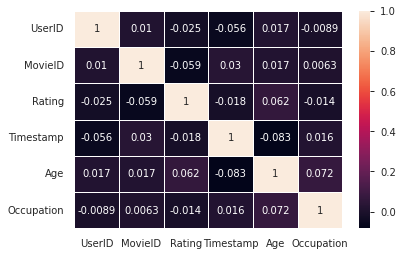

In [12]:
corr = df.corr()
sns.heatmap(corr,annot= True,linewidths=0.5)

In [16]:
# Extracting pandas profiling report

pfr = pf.ProfileReport(df)
pfr.to_file('Movielens_pfr.html')

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
print('Na values in the data frame is :')
def is_na(x):
    for i in x.columns:
        print(i,'column',' :',x[i].isna().sum(),'\n')
is_na(df)

Na values in the data frame is :
UserID column  : 402 

MovieID column  : 4715 

Rating column  : 5117 

Timestamp column  : 5117 

Gender column  : 402 

Age column  : 402 

Occupation column  : 402 

Zip-code column  : 402 

Title column  : 5171 

Genres column  : 5171 



In [18]:
df.dropna(inplace=True)

In [19]:
df.Rating.isna().value_counts()

False    218052
Name: Rating, dtype: int64

In [20]:
def df_unique(X):
    for i in X.columns:
        print('Column : ',i,'\n',X[i].unique(), '\n Total unique values is: ', X[i].nunique())
        print('----------------------------------------------------------------------')
df_unique(df)

Column :  UserID 
 [1.000e+00 2.000e+00 1.200e+01 ... 1.580e+02 1.154e+03 7.450e+02] 
 Total unique values is:  1325
----------------------------------------------------------------------
Column :  MovieID 
 [1193.  661.  914. ... 2101. 2563. 3905.] 
 Total unique values is:  3480
----------------------------------------------------------------------
Column :  Rating 
 [5. 4. 3. 2. 1.] 
 Total unique values is:  5
----------------------------------------------------------------------
Column :  Timestamp 
 [9.78300760e+08 9.78298413e+08 9.78220179e+08 ... 9.74790833e+08
 1.01401892e+09 1.01174612e+09] 
 Total unique values is:  102298
----------------------------------------------------------------------
Column :  Gender 
 ['F' 'M'] 
 Total unique values is:  2
----------------------------------------------------------------------
Column :  Age 
 [ 1. 56. 25. 50. 18. 45. 35.] 
 Total unique values is:  7
----------------------------------------------------------------------
Column :  Oc

Exploring the datasets using visual representations


<AxesSubplot:>

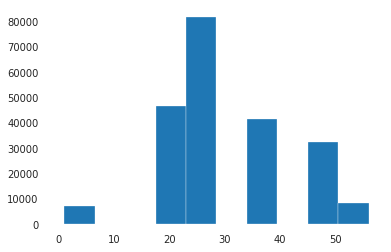

In [21]:
#Visualizing the User Age Distribution

df.Age.hist(grid=False)

In [22]:
#Visualizing User rating of the movie “Toy Story”
def fn(x):
    return re.search("Toy Story".lower(), x.lower())!=None
title = df.iloc[0].Title
title


"One Flew Over the Cuckoo's Nest (1975)"

In [23]:
re_tit = df["Title"].apply(fn)
re_tit.head()

0    False
1    False
2    False
3    False
4    False
Name: Title, dtype: bool

In [24]:
toystory = df[df["Title"].apply(fn)]
toystory

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
12156,1.0,3114.0,4.0,9.783022e+08,F,1.0,10.0,48067,Toy Story 2 (1999),Animation|Children's|Comedy
12157,3.0,3114.0,3.0,9.782981e+08,M,25.0,15.0,55117,Toy Story 2 (1999),Animation|Children's|Comedy
12158,9.0,3114.0,4.0,9.782260e+08,M,25.0,17.0,61614,Toy Story 2 (1999),Animation|Children's|Comedy
12159,10.0,3114.0,4.0,9.782258e+08,F,35.0,1.0,95370,Toy Story 2 (1999),Animation|Children's|Comedy
12160,17.0,3114.0,5.0,9.781594e+08,M,50.0,1.0,95350,Toy Story 2 (1999),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
12536,1300.0,3114.0,5.0,9.747896e+08,M,1.0,10.0,97201,Toy Story 2 (1999),Animation|Children's|Comedy
12537,1301.0,3114.0,3.0,9.747886e+08,F,25.0,2.0,10475,Toy Story 2 (1999),Animation|Children's|Comedy
12538,1306.0,3114.0,4.0,1.006603e+09,M,25.0,3.0,64068,Toy Story 2 (1999),Animation|Children's|Comedy
12539,1314.0,3114.0,1.0,9.747853e+08,F,18.0,4.0,68154,Toy Story 2 (1999),Animation|Children's|Comedy


<AxesSubplot:>

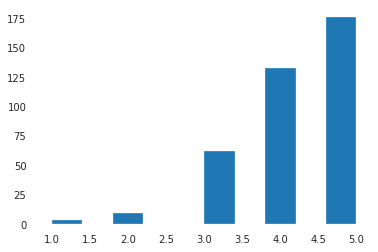

In [25]:
toystory.Rating.hist(grid=False)

Top 25movies based on viewer ratings


In [26]:
top_25 = df.groupby(["MovieID", "Title"]).Timestamp.count().sort_values(ascending=False)
top_25

MovieID  Title                                                
2858.0   American Beauty (1999)                                   793
1196.0   Star Wars: Episode V - The Empire Strikes Back (1980)    654
480.0    Jurassic Park (1993)                                     646
260.0    Star Wars: Episode IV - A New Hope (1977)                644
1210.0   Star Wars: Episode VI - Return of the Jedi (1983)        642
                                                                 ... 
2631.0   Frogs for Snakes (1998)                                    1
1773.0   Tokyo Fist (1995)                                          1
758.0    Jar, The (Khomreh) (1992)                                  1
120.0    Race the Sun (1996)                                        1
1579.0   For Ever Mozart (1996)                                     1
Name: Timestamp, Length: 3480, dtype: int64

In [27]:
print('Top 25 movies by viewership rating')
print(top_25[:25])

Top 25 movies by viewership rating
MovieID  Title                                                
2858.0   American Beauty (1999)                                   793
1196.0   Star Wars: Episode V - The Empire Strikes Back (1980)    654
480.0    Jurassic Park (1993)                                     646
260.0    Star Wars: Episode IV - A New Hope (1977)                644
1210.0   Star Wars: Episode VI - Return of the Jedi (1983)        642
2028.0   Saving Private Ryan (1998)                               602
589.0    Terminator 2: Judgment Day (1991)                        585
2571.0   Matrix, The (1999)                                       582
1580.0   Men in Black (1997)                                      579
593.0    Silence of the Lambs, The (1991)                         563
110.0    Braveheart (1995)                                        551
1198.0   Raiders of the Lost Ark (1981)                           549
2396.0   Shakespeare in Love (1998)                           

The ratings for all the movies reviewed by for a particular user of user id = 1314

In [29]:
usr_1314= df.loc[df.UserID==1314, "Rating"].sort_values(ascending=False)
usr_1314 .head(),usr_1314.shape

(112591    5.0
 189453    5.0
 183180    5.0
 96691     5.0
 37489     5.0
 Name: Rating, dtype: float64,
 (227,))

<AxesSubplot:>

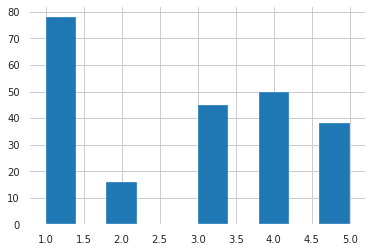

In [30]:
usr_1314.hist()

Finding all the unique genres

In [31]:
df.Genres.unique()

array(['Drama', "Animation|Children's|Musical", 'Musical|Romance',
       "Animation|Children's|Comedy", 'Action|Adventure|Comedy|Romance',
       'Action|Adventure|Drama', 'Comedy|Drama',
       "Adventure|Children's|Drama|Musical", 'Musical', 'Comedy',
       "Animation|Children's", 'Comedy|Fantasy', 'Animation',
       'Comedy|Sci-Fi', 'Drama|War', 'Romance',
       "Animation|Children's|Musical|Romance",
       "Children's|Drama|Fantasy|Sci-Fi", 'Drama|Romance',
       'Animation|Comedy|Thriller',
       "Adventure|Animation|Children's|Comedy|Musical",
       "Animation|Children's|Comedy|Musical", 'Thriller',
       'Action|Crime|Romance', 'Action|Adventure|Fantasy|Sci-Fi',
       "Children's|Comedy|Musical", 'Action|Drama|War',
       "Children's|Drama", 'Crime|Drama|Thriller', 'Action|Crime|Drama',
       'Action|Adventure|Mystery', 'Crime|Drama',
       'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Romance|Sci-Fi|War', 'Action|Thriller',
       'Action|Drama', 'Co

In [32]:
Genres_list = df.Genres.tolist()
genre_list = []
i = 0
while(i<len(Genres_list)):
    genre_list+= Genres_list[i].split('|')
    i+=1

In [33]:
unique_gen = list(set(genre_list))
print(unique_gen)
print()
print("Length of the unique Genre : ",len(unique_gen))

['Action', 'War', 'Documentary', 'Musical', 'Fantasy', 'Sci-Fi', 'Mystery', "Children's", 'Horror', 'Crime', 'Comedy', 'Adventure', 'Thriller', 'Western', 'Animation', 'Drama', 'Film-Noir', 'Romance']

Length of the unique Genre :  18


Creating a separate column for each genre category with a one-hot encoding ( 1 and 0)

In [34]:
new_data = pd.concat([df,df.Genres.str.get_dummies()], axis=1)
print(new_data.columns)

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [35]:
new_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,1193.0,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193.0,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
2,12.0,1193.0,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1193.0,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
4,17.0,1193.0,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_new = new_data.drop(['Title','Zip-code','Timestamp','Genres'],axis=1)
df_new.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,1193.0,5.0,F,1.0,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193.0,5.0,M,56.0,16.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.0,1193.0,4.0,M,25.0,12.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1193.0,4.0,M,25.0,7.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,1193.0,5.0,M,50.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
print(df_new.columns)

Index(['UserID', 'MovieID', 'Rating', 'Gender', 'Age', 'Occupation', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


Encoding the gender column

In [38]:
df_new.Gender = pd.get_dummies(df_new.Gender)

In [39]:
x = df_new.drop(['UserID','MovieID','Rating'],axis=1)
x.shape

(218052, 21)

The features affecting the ratings of any particular movie.

In [40]:
print('The features affecting the ratings of any particular movie:')
print()
print(x.columns)

The features affecting the ratings of any particular movie:

Index(['Gender', 'Age', 'Occupation', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')


In [41]:
y = df_new.Rating
y.shape

(218052,)

In [42]:
x.Occupation.value_counts()

0.0     29711
4.0     27198
7.0     21572
1.0     19332
17.0    15837
20.0    15232
12.0    13249
2.0      9963
16.0     9617
3.0      9405
14.0     7979
10.0     7190
6.0      7177
15.0     4514
19.0     4357
11.0     4218
13.0     3391
9.0      2631
5.0      2290
18.0     1881
8.0      1308
Name: Occupation, dtype: int64

In [43]:
x = x.join(pd.get_dummies(x.Occupation,prefix='Occupation'))
x.head(),x.columns

(   Gender   Age  Occupation  Action  Adventure  Animation  Children's  Comedy  \
 0       1   1.0        10.0       0          0          0           0       0   
 1       0  56.0        16.0       0          0          0           0       0   
 2       0  25.0        12.0       0          0          0           0       0   
 3       0  25.0         7.0       0          0          0           0       0   
 4       0  50.0         1.0       0          0          0           0       0   
 
    Crime  Documentary  ...  Occupation_11.0  Occupation_12.0  Occupation_13.0  \
 0      0            0  ...                0                0                0   
 1      0            0  ...                0                0                0   
 2      0            0  ...                0                1                0   
 3      0            0  ...                0                0                0   
 4      0            0  ...                0                0                0   
 
    Occupati

In [44]:
x = x.drop(['Occupation','Occupation_0.0'],axis=1)
x.head(3),x.shape

(   Gender   Age  Action  Adventure  Animation  Children's  Comedy  Crime  \
 0       1   1.0       0          0          0           0       0      0   
 1       0  56.0       0          0          0           0       0      0   
 2       0  25.0       0          0          0           0       0      0   
 
    Documentary  Drama  ...  Occupation_11.0  Occupation_12.0  Occupation_13.0  \
 0            0      1  ...                0                0                0   
 1            0      1  ...                0                0                0   
 2            0      1  ...                0                1                0   
 
    Occupation_14.0  Occupation_15.0  Occupation_16.0  Occupation_17.0  \
 0                0                0                0                0   
 1                0                0                1                0   
 2                0                0                0                0   
 
    Occupation_18.0  Occupation_19.0  Occupation_20.0  
 0    

Deploying the hold out method


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 10,stratify=y)

Deploying the model

In [49]:
lgb = LGBMClassifier(boosting_type = 'gbdt',n_jobs= -1,objective='multiclass')

In [50]:
lgb.fit(x_train,y_train)

LGBMClassifier(objective='multiclass')

In [51]:
y_pred = lgb.predict(x_test)

In [52]:
print('LGBM accuracy score is : ', accuracy_score(y_test,y_pred)*100)

LGBM accuracy score is :  37.025062484235626


In [54]:
xgb = xgboost.XGBClassifier(n_jobs=-1)

In [ ]:
xgb.fit(x_train,y_train)

In [ ]:
y_pred_xgb = xgb.predict(x_test)

In [ ]:
print('XGB accuracy score is : ', accuracy_score(y_test,y_pred_xgb )*100)

Accuracy score of both the model
LGBM accuracy score is : 36.19%

XGB accuracy score is : 35.39%